### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, r2_score, mean_squared_error,ConfusionMatrixDisplay

In [ ]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 1. Classification

In [ ]:
df = pd.read_csv('mobile_price_classification.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Nhan xet: cac bien deu o dang numeric, khong co gia tri null

In [ ]:
df_output = df[['price_range']]
df_input = df.drop(['price_range'],axis=1)

#### 1. Univariate analysis

=====
central tendency of battery_power: {'mean': 1238.5185, 'median': 1226.0, 'mode': 618, 'min': 501, 'max': 1998, 'range': 1497}
=====
Dispersion of battery_power: 
 {'range': 1497, 'q1': 851.75, 'q3': 1615.25, 'iqr': 763.5, 'var': 193088.35983766883, 'skew': 0.03189847179278164, 'kurtosis': -1.2241438831965528}
=====


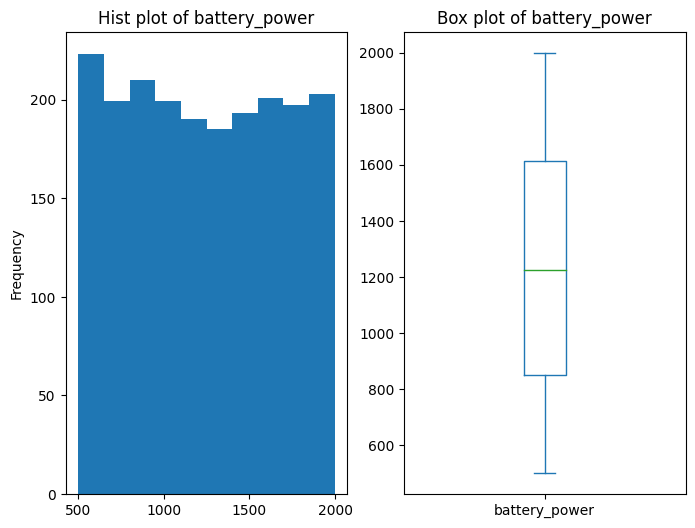

=====
central tendency of blue: {'mean': 0.495, 'median': 0.0, 'mode': 0, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of blue: 
 {'range': 1, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 0.25010005002501245, 'skew': 0.020016015215014945, 'kurtosis': -2.0016019625995645}
=====


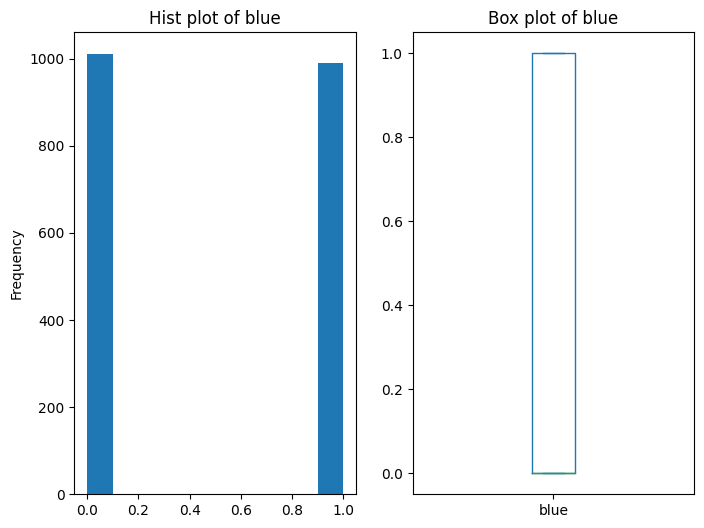

=====
central tendency of clock_speed: {'mean': 1.52225, 'median': 1.5, 'mode': 0.5, 'min': 0.5, 'max': 3.0, 'range': 2.5}
=====
Dispersion of clock_speed: 
 {'range': 2.5, 'q1': 0.7, 'q3': 2.2, 'iqr': 1.5000000000000002, 'var': 0.6658628689344672, 'skew': 0.1780841202790887, 'kurtosis': -1.3234172221019123}
=====


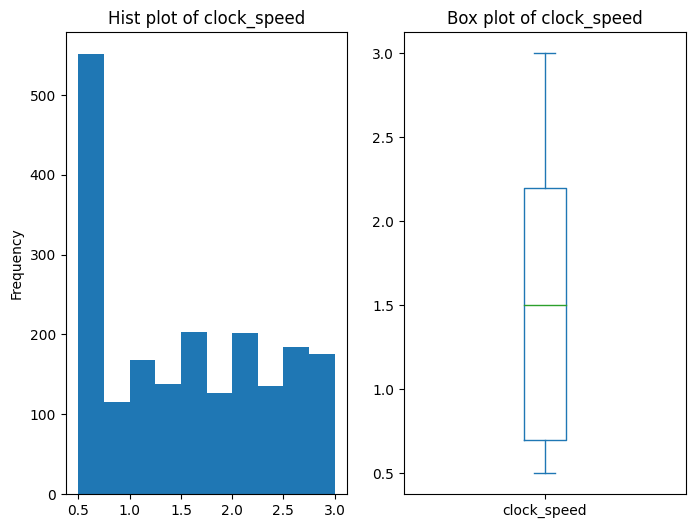

=====
central tendency of dual_sim: {'mean': 0.5095, 'median': 1.0, 'mode': 1, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of dual_sim: 
 {'range': 1, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 0.25003476738369185, 'skew': -0.03803539334775485, 'kurtosis': -2.0005548652196294}
=====


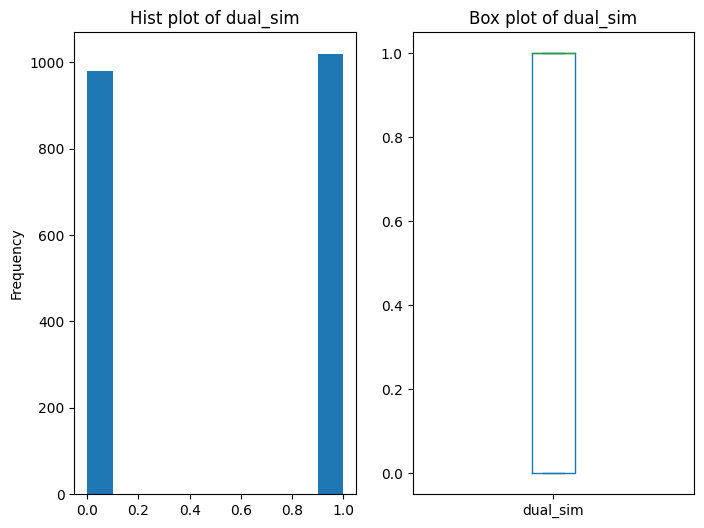

=====
central tendency of fc: {'mean': 4.3095, 'median': 3.0, 'mode': 0, 'min': 0, 'max': 19, 'range': 19}
=====
Dispersion of fc: 
 {'range': 19, 'q1': 1.0, 'q3': 7.0, 'iqr': 6.0, 'var': 18.848133816908447, 'skew': 1.0198114105315519, 'kurtosis': 0.2770763245651877}
=====


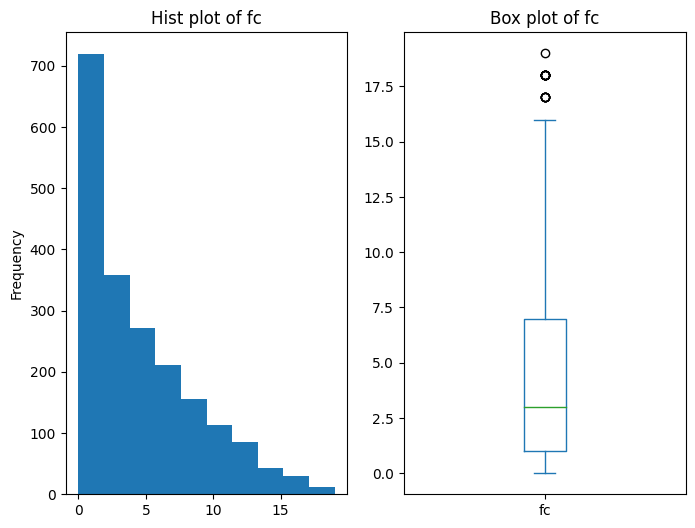

=====
central tendency of four_g: {'mean': 0.5215, 'median': 1.0, 'mode': 1, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of four_g: 
 {'range': 1, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 0.24966258129064534, 'skew': -0.08614423907054716, 'kurtosis': -1.9945747463198134}
=====


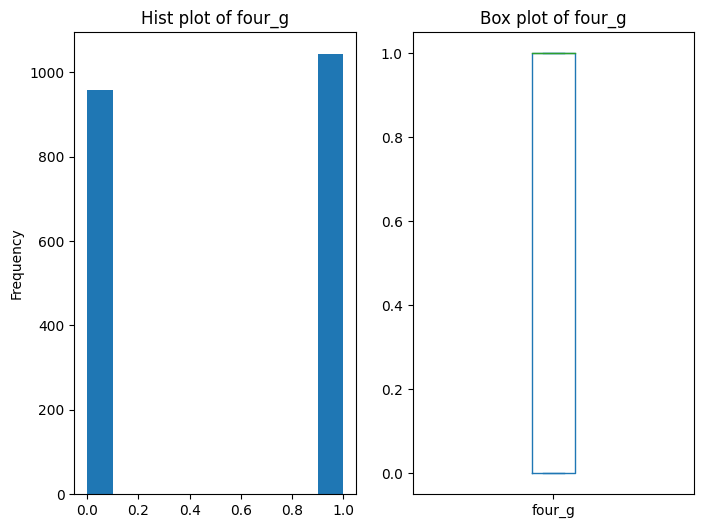

=====
central tendency of int_memory: {'mean': 32.0465, 'median': 32.0, 'mode': 27, 'min': 2, 'max': 64, 'range': 62}
=====
Dispersion of int_memory: 
 {'range': 62, 'q1': 16.0, 'q3': 48.0, 'iqr': 32.0, 'var': 329.2669712356178, 'skew': 0.05788932785206039, 'kurtosis': -1.2160740301516093}
=====


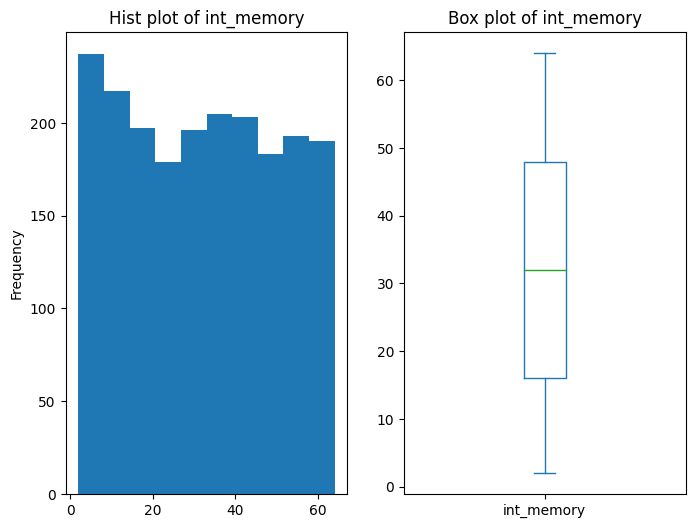

=====
central tendency of m_dep: {'mean': 0.50175, 'median': 0.5, 'mode': 0.1, 'min': 0.1, 'max': 1.0, 'range': 0.9}
=====
Dispersion of m_dep: 
 {'range': 0.9, 'q1': 0.2, 'q3': 0.8, 'iqr': 0.6000000000000001, 'var': 0.08318352926463232, 'skew': 0.08908200979245855, 'kurtosis': -1.2743488835633268}
=====


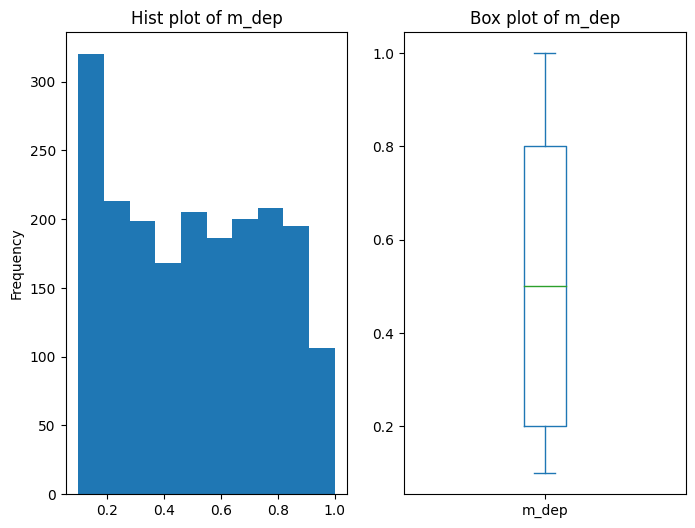

=====
central tendency of mobile_wt: {'mean': 140.249, 'median': 141.0, 'mode': 182, 'min': 80, 'max': 200, 'range': 120}
=====
Dispersion of mobile_wt: 
 {'range': 120, 'q1': 109.0, 'q3': 170.0, 'iqr': 61.0, 'var': 1253.1355667833916, 'skew': 0.006558157428692449, 'kurtosis': -1.2103764737553446}
=====


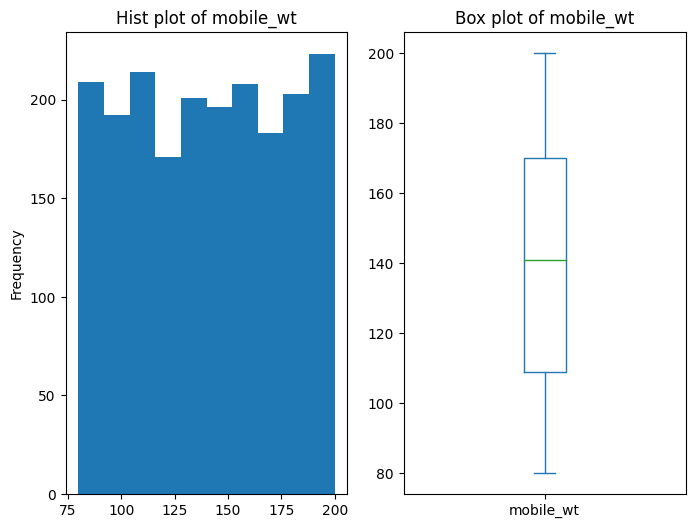

=====
central tendency of n_cores: {'mean': 4.5205, 'median': 4.0, 'mode': 4, 'min': 1, 'max': 8, 'range': 7}
=====
Dispersion of n_cores: 
 {'range': 7, 'q1': 3.0, 'q3': 7.0, 'iqr': 4.0, 'var': 5.234196848424212, 'skew': 0.0036275083137803994, 'kurtosis': -1.229749766610346}
=====


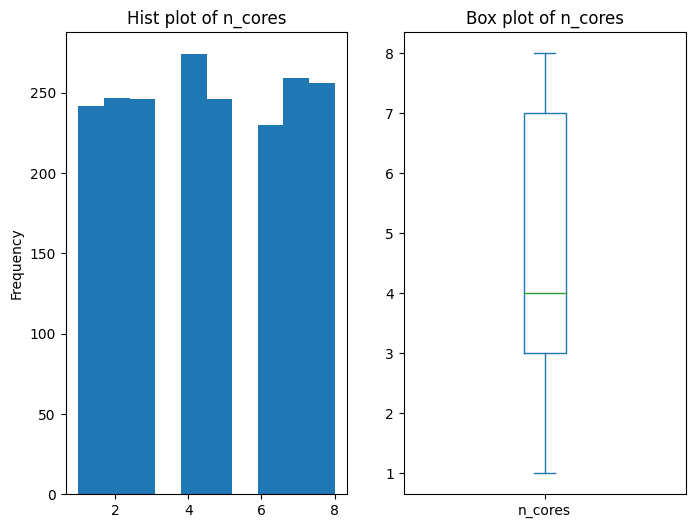

=====
central tendency of pc: {'mean': 9.9165, 'median': 10.0, 'mode': 10, 'min': 0, 'max': 20, 'range': 20}
=====
Dispersion of pc: 
 {'range': 20, 'q1': 5.0, 'q3': 15.0, 'iqr': 10.0, 'var': 36.775915707853926, 'skew': 0.017306150471392553, 'kurtosis': -1.1714987948421944}
=====


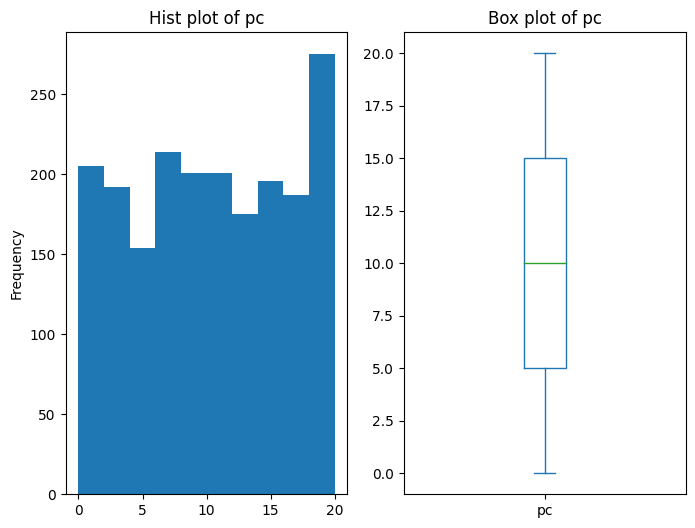

=====
central tendency of px_height: {'mean': 645.108, 'median': 564.0, 'mode': 347, 'min': 0, 'max': 1960, 'range': 1960}
=====
Dispersion of px_height: 
 {'range': 1960, 'q1': 282.75, 'q3': 947.25, 'iqr': 664.5, 'var': 196941.40804002003, 'skew': 0.6662712560691598, 'kurtosis': -0.3158654936040146}
=====


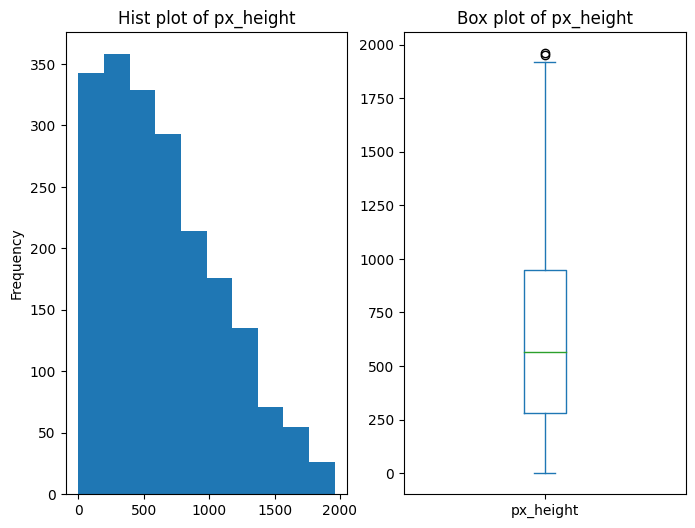

=====
central tendency of px_width: {'mean': 1251.5155, 'median': 1247.0, 'mode': 874, 'min': 500, 'max': 1998, 'range': 1498}
=====
Dispersion of px_width: 
 {'range': 1498, 'q1': 874.75, 'q3': 1633.0, 'iqr': 758.25, 'var': 186796.36194072038, 'skew': 0.014787473768006081, 'kurtosis': -1.186005229243282}
=====


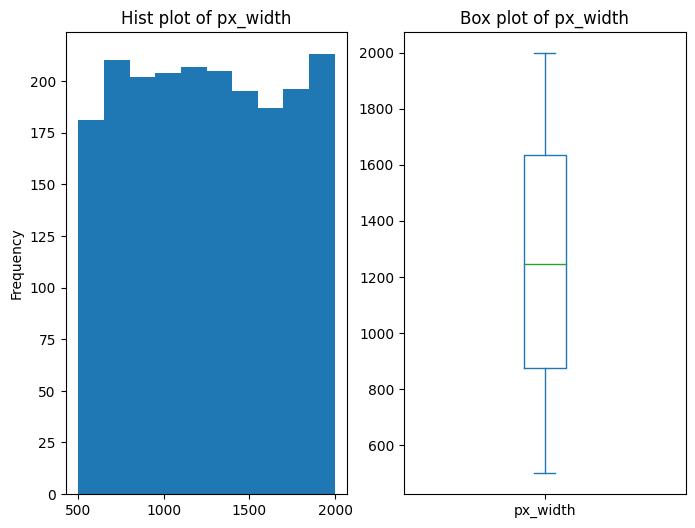

=====
central tendency of ram: {'mean': 2124.213, 'median': 2146.5, 'mode': 1229, 'min': 256, 'max': 3998, 'range': 3742}
=====
Dispersion of ram: 
 {'range': 3742, 'q1': 1207.5, 'q3': 3064.5, 'iqr': 1857.0, 'var': 1176643.6064342172, 'skew': 0.006628035398750348, 'kurtosis': -1.1919130700631546}
=====


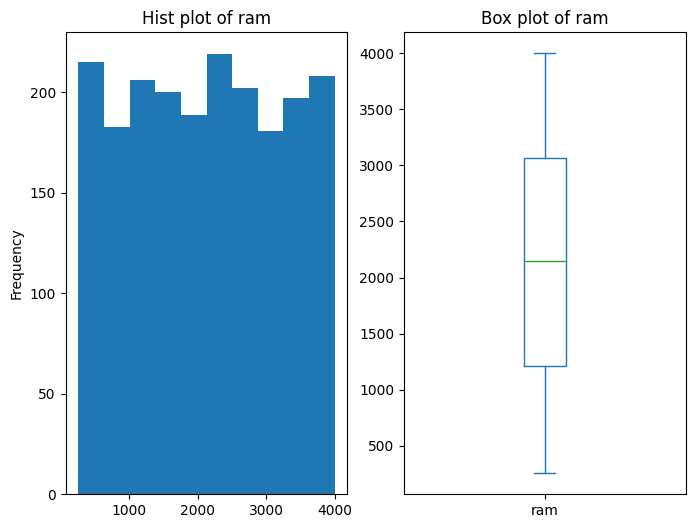

=====
central tendency of sc_h: {'mean': 12.3065, 'median': 12.0, 'mode': 17, 'min': 5, 'max': 19, 'range': 14}
=====
Dispersion of sc_h: 
 {'range': 14, 'q1': 9.0, 'q3': 16.0, 'iqr': 7.0, 'var': 17.751433466733367, 'skew': -0.09888424098283438, 'kurtosis': -1.1907912468413369}
=====


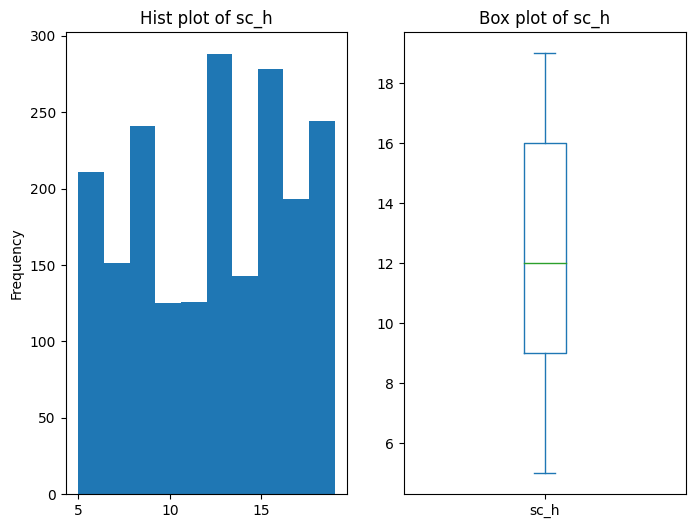

=====
central tendency of sc_w: {'mean': 5.767, 'median': 5.0, 'mode': 1, 'min': 0, 'max': 18, 'range': 18}
=====
Dispersion of sc_w: 
 {'range': 18, 'q1': 2.0, 'q3': 9.0, 'iqr': 7.0, 'var': 18.978200100050028, 'skew': 0.6337870734456067, 'kurtosis': -0.3895227893524629}
=====


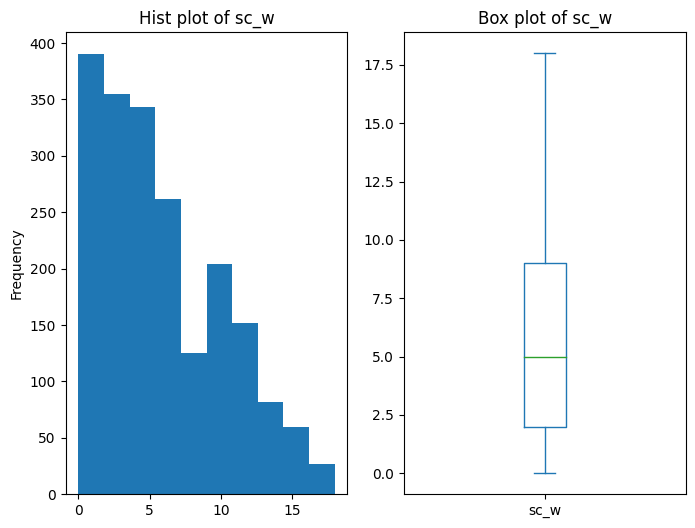

=====
central tendency of talk_time: {'mean': 11.011, 'median': 11.0, 'mode': 7, 'min': 2, 'max': 20, 'range': 18}
=====
Dispersion of talk_time: 
 {'range': 18, 'q1': 6.0, 'q3': 16.0, 'iqr': 10.0, 'var': 29.8548064032016, 'skew': 0.009511762221541457, 'kurtosis': -1.2185909629106917}
=====


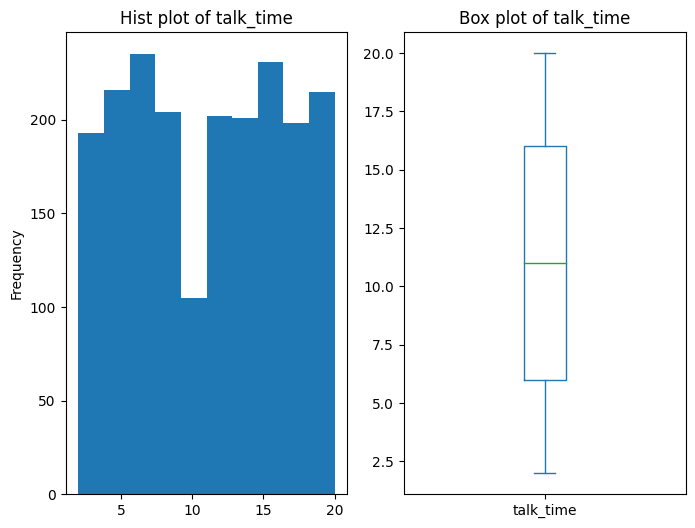

=====
central tendency of three_g: {'mean': 0.7615, 'median': 1.0, 'mode': 1, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of three_g: 
 {'range': 1, 'q1': 1.0, 'q3': 1.0, 'iqr': 0.0, 'var': 0.1817086043021511, 'skew': -1.2281416344153246, 'kurtosis': -0.4921612878504602}
=====


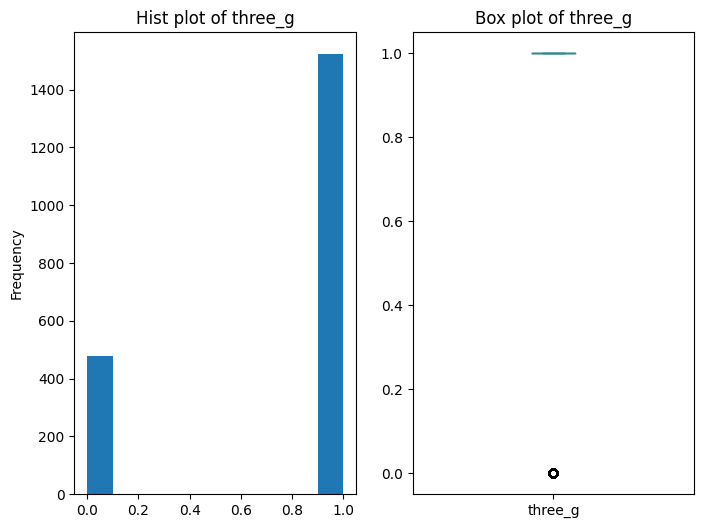

=====
central tendency of touch_screen: {'mean': 0.503, 'median': 1.0, 'mode': 1, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of touch_screen: 
 {'range': 1, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 0.2501160580290145, 'skew': -0.012009224801531652, 'kurtosis': -2.0018586386605075}
=====


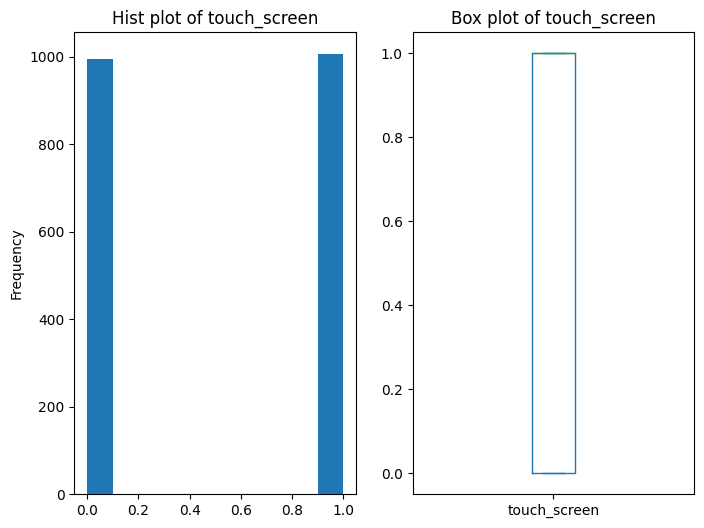

=====
central tendency of wifi: {'mean': 0.507, 'median': 1.0, 'mode': 1, 'min': 0, 'max': 1, 'range': 1}
=====
Dispersion of wifi: 
 {'range': 1, 'q1': 0.0, 'q3': 1.0, 'iqr': 1.0, 'var': 0.2500760380190095, 'skew': -0.028023766608637157, 'kurtosis': -2.0012168868938183}
=====


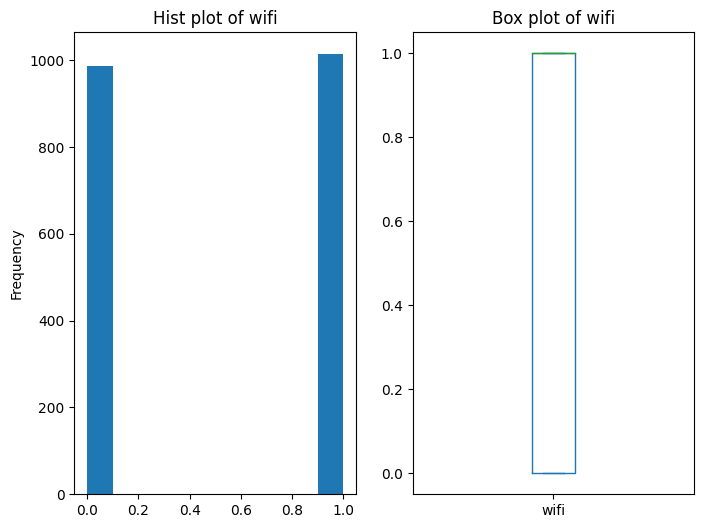

In [ ]:
for i in df_input.columns.to_list():
    _analyzer.analyze_numeric_variable(i, df_input)

Nhan xet: fc va px_heigh co ton tai 1 so outliers

=====
central tendency of price_range: {'mean': 1.5, 'median': 1.5, 'mode': 0, 'min': 0, 'max': 3, 'range': 3}
=====
Dispersion of price_range: 
 {'range': 3, 'q1': 0.75, 'q3': 2.25, 'iqr': 1.5, 'var': 1.2506253126563283, 'skew': 0.0, 'kurtosis': -1.360400119699068}
=====


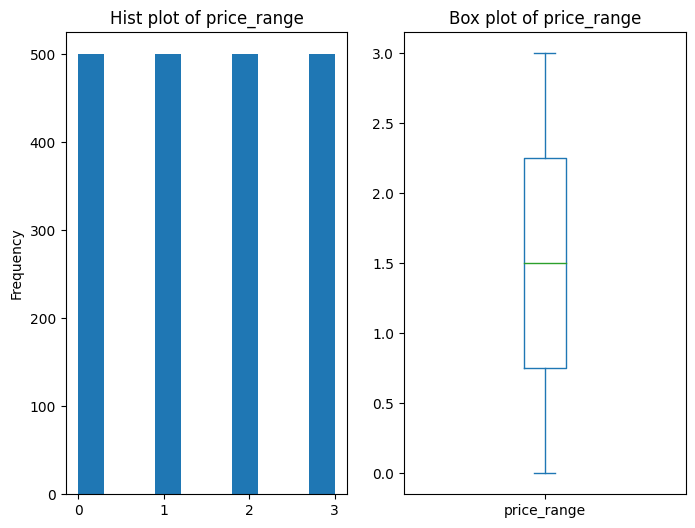

In [ ]:
_analyzer.analyze_numeric_variable(df_output.columns[0],df_output)

In [ ]:
df_input.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


#### 2. Biraviant analysis

In [ ]:
# input numerics vs output numerics

In [ ]:
df.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [ ]:
# ta nhan thay price_range co quan he voi ram va battery_power nhieu nhat

#### 3. Remove outliers

In [ ]:
def remove_outlier(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
for i in ['fc','px_height']:
    df = remove_outlier(i,df)

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### 4. Data Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
minmax = MinMaxScaler()

In [ ]:
df_in = df.drop(['price_range'], axis=1)
df_out = df[['price_range']]

In [ ]:
df_in.reset_index(drop=True, inplace=True)

In [ ]:
scale = minmax.fit_transform(df_in)
df_scaled = pd.DataFrame(scale, columns=df_in.columns.to_list()).add_prefix('scaled_')

In [ ]:
df_scaled

,scaled_battery_power,scaled_blue,scaled_clock_speed,scaled_dual_sim,scaled_fc,scaled_four_g,scaled_int_memory,scaled_m_dep,scaled_mobile_wt,scaled_n_cores,scaled_pc,scaled_px_height,scaled_px_width,scaled_ram,scaled_sc_h,scaled_sc_w,scaled_talk_time,scaled_three_g,scaled_touch_screen,scaled_wifi
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.195725,1.0,0.00,1.0,0.0000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1976,0.977956,1.0,0.84,1.0,0.0000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1977,0.941884,0.0,0.16,1.0,0.0625,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1978,0.675351,0.0,0.16,0.0,0.2500,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


#### 5. Resample & Finding important feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y = df_out
X = df_scaled

In [ ]:
clf = RandomForestRegressor(n_estimators=250)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.06056659932659934


In [ ]:
print("R^2 score: ",clf.score(X,y))
print("Training score: ",clf.score(X_train,y_train))
print("Testing score: ",clf.score(X_test,y_test))

R^2 score:  0.9789276205896265
Training score:  0.9904648165896637
Testing score:  0.9538435293914366


In [ ]:
# cac score cua model deu cao

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

scaled_ram              0.855138
scaled_battery_power    0.056483
scaled_px_height        0.035076
scaled_px_width         0.026441
scaled_mobile_wt        0.004825
scaled_int_memory       0.003340
scaled_sc_h             0.002417
scaled_talk_time        0.002416
scaled_pc               0.002376
scaled_sc_w             0.001990
scaled_m_dep            0.001946
scaled_fc               0.001802
scaled_n_cores          0.001729
scaled_clock_speed      0.001715
scaled_four_g           0.000490
scaled_blue             0.000411
scaled_dual_sim         0.000382
scaled_three_g          0.000378
scaled_wifi             0.000337
scaled_touch_screen     0.000309
dtype: float64

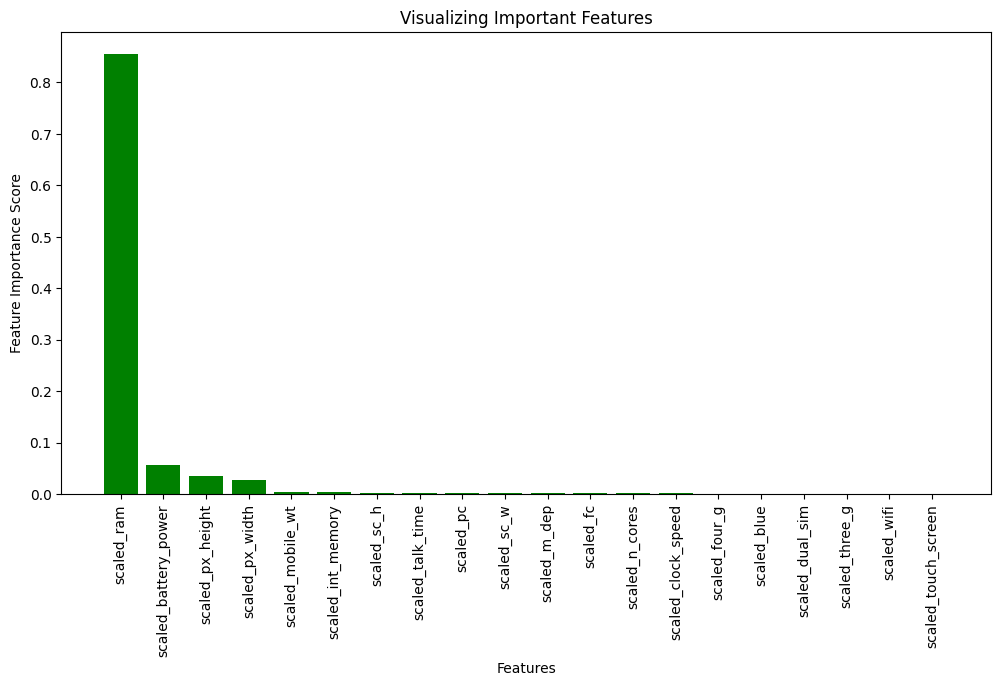

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(feature_imp.index, feature_imp, color="g")
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
feature_imp_select = feature_imp[feature_imp >0.001]
feature_imp_select

scaled_ram              0.855138
scaled_battery_power    0.056483
scaled_px_height        0.035076
scaled_px_width         0.026441
scaled_mobile_wt        0.004825
scaled_int_memory       0.003340
scaled_sc_h             0.002417
scaled_talk_time        0.002416
scaled_pc               0.002376
scaled_sc_w             0.001990
scaled_m_dep            0.001946
scaled_fc               0.001802
scaled_n_cores          0.001729
scaled_clock_speed      0.001715
dtype: float64

In [ ]:
X1 = df_scaled[feature_imp_select.index]
y1 = df_out

#### 6. Build model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [ ]:
sampler = SMOTE()

In [ ]:
X_resample, y_resample = sampler.fit_resample(X_train, y_train)

In [ ]:
classifiers =[]
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [ ]:
for clf in classifiers:
    clf.fit(X_resample, y_resample)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) is 0.9057239057239057
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=

In [ ]:
# Dua vao cac chi so tren => chon XGBClassifier

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = -1,
    cv = 10,
    verbose=True
)

In [ ]:
model = grid_search.fit(X_resample, y_resample)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9158249158249159


In [ ]:
#train score
model.score(X_resample, y_resample)

1.0

In [ ]:
# test score
model.score(X_test, y_test)

0.9158249158249159

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[131   9   0   0]
 [  6 144   5   0]
 [  0  12 125   6]
 [  0   0  12 144]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       140
           1       0.87      0.93      0.90       155
           2       0.88      0.87      0.88       143
           3       0.96      0.92      0.94       156

    accuracy                           0.92       594
   macro avg       0.92      0.92      0.92       594
weighted avg       0.92      0.92      0.92       594



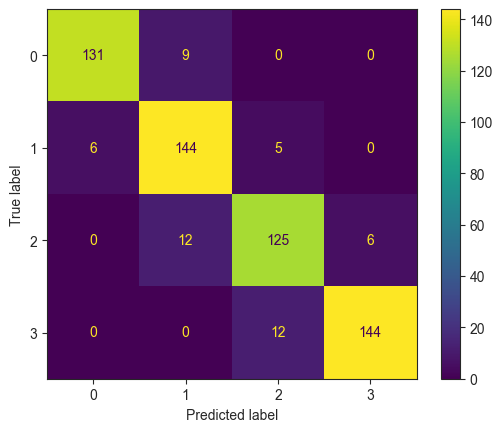

In [ ]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
# model co accuracy tuong doi cao, tuy vay diem train > test, model bi overfitting